Preparacion de datos para poder construir un modelo predictivo que permita calcular el revenue por pais en un mes futuro.


In [59]:
import pandas as pd # importar librerias pandas
import numpy as np # importar libreria numpy
import sklearn.metrics # importar libreria sklearn

In [60]:

#Cargo el archivo
file_runrates ='https://raw.githubusercontent.com/jzuluagams/Eafit_AI/main/Dataset_Runrates2.xlsx' # Cargar archivo fuente, updated URL to raw content
runrates = pd.read_excel(file_runrates) # Lectura de archivo y cargarlo a la variable runrates
print(runrates.columns)
runrates.head()

Index(['Country', 'Service Line', 'Product Line', 'Business ID', 'Year',
       'Month', 'Sales'],
      dtype='object')


,Country,Service Line,Product Line,Business ID,Year,Month,Sales
0,3-076 - Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2022,2022 - Jun,1
1,3-076 - Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2022,2022 - Jul,33
2,3-076 - Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2022,2022 - Aug,3243
3,3-076 - Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2022,2022 - Sep,2057
4,3-076 - Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2022,2022 - Oct,2032


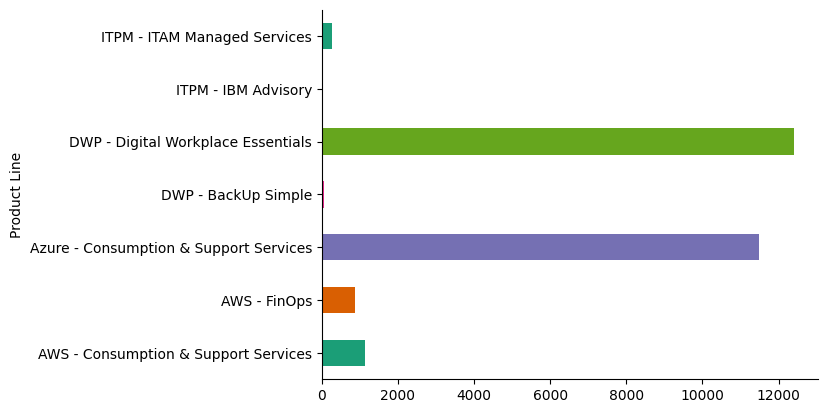

In [61]:
# @title Product Line

from matplotlib import pyplot as plt
import seaborn as sns
runrates.groupby('Product Line').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [62]:
# Calculando mediana, minimo, maximo
mean_sales = runrates['Sales'].mean()
min_sales = runrates['Sales'].min()
max_sales = runrates['Sales'].max()
print(mean_sales)
print(min_sales)
print(max_sales)

373.5836538827741
-58865
2453779


In [63]:
runrates['Country_Code'] = runrates['Country'].str[:5]  # Extraer 5 caracteres correspondientes al codigo del Pais
runrates['Country_Name'] = runrates['Country'].str[8:]  # Dejar desde el caracter 8 en adelante el nombre del pais

print(runrates[['Country_Code', 'Country_Name']].head())
runrates.head()

  Country_Code Country_Name
0        3-076       Brazil
1        3-076       Brazil
2        3-076       Brazil
3        3-076       Brazil
4        3-076       Brazil


,Country,Service Line,Product Line,Business ID,Year,Month,Sales,Country_Code,Country_Name
0,3-076 - Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2022,2022 - Jun,1,3-076,Brazil
1,3-076 - Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2022,2022 - Jul,33,3-076,Brazil
2,3-076 - Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2022,2022 - Aug,3243,3-076,Brazil
3,3-076 - Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2022,2022 - Sep,2057,3-076,Brazil
4,3-076 - Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2022,2022 - Oct,2032,3-076,Brazil


In [64]:
# Borrar la Columna Original 'Country'
runrates = runrates.drop('Country', axis=1)

In [65]:

# Reordenar Columnas, 'Country_Code' y 'Country_Name' como Columnas iniciales
new_column_order = ['Country_Code', 'Country_Name'] + [col for col in runrates.columns if col not in ['Country_Code', 'Country_Name']]
runrates = runrates[new_column_order]

print(runrates.columns)

Index(['Country_Code', 'Country_Name', 'Service Line', 'Product Line',
       'Business ID', 'Year', 'Month', 'Sales'],
      dtype='object')


In [66]:
# Modificar Columna Month

runrates['Extract_Year'] = runrates['Month'].str[:6]  # Extraer 6 caracteres correspondientes al codigo del Pais
runrates['Month'] = runrates['Month'].str[7:]  # Dejar desde el caracter 7 en adelante el nombre del mes

print(runrates[['Extract_Year', 'Month']].head())

  Extract_Year Month
0       2022 -   Jun
1       2022 -   Jul
2       2022 -   Aug
3       2022 -   Sep
4       2022 -   Oct


In [67]:
runrates = runrates.drop('Extract_Year', axis=1)
print(runrates.columns)
runrates.head()

Index(['Country_Code', 'Country_Name', 'Service Line', 'Product Line',
       'Business ID', 'Year', 'Month', 'Sales'],
      dtype='object')


,Country_Code,Country_Name,Service Line,Product Line,Business ID,Year,Month,Sales
0,3-076,Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2022,Jun,1
1,3-076,Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2022,Jul,33
2,3-076,Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2022,Aug,3243
3,3-076,Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2022,Sep,2057
4,3-076,Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2022,Oct,2032


In [68]:
# Borrar la Columna Original 'Country'
runrates = runrates.drop('Country_Code', axis=1)

In [69]:
# Assuming 'runrates' is your DataFrame
runrates['Business ID'] = runrates['Business ID'].astype(str)
runrates['Month'] = runrates['Month'].astype(str)
runrates['Service Line'] = runrates['Service Line'].astype(str)
runrates['Product Line'] = runrates['Product Line'].astype(str)

# Check if the conversion was successful
print(runrates['Business ID'].dtype)

object


In [70]:
# Agrupando Sales de acuerdo a las categorias
runrates_agrupados = runrates.groupby(['Country_Name', 'Service Line', 'Product Line', 'Business ID', 'Year', 'Month'])['Sales'].sum().reset_index()
runrates = runrates_agrupados
print(runrates.columns)
runrates.head()

Index(['Country_Name', 'Service Line', 'Product Line', 'Business ID', 'Year',
       'Month', 'Sales'],
      dtype='object')


,Country_Name,Service Line,Product Line,Business ID,Year,Month,Sales
0,Brazil,Cloud Services AWS,AWS - Consumption & Support Services,CAW-0032 - CLICK,2023,Aug,131
1,Brazil,Cloud Services AWS,AWS - Consumption & Support Services,CAW-0032 - CLICK,2023,Sep,69
2,Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2021,Apr,44527
3,Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2021,Aug,12241
4,Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2021,Dec,63235


In [71]:
#Remover outliers en Sales

import pandas as pd

# Factor para ajustar el rango de outliers
factor = 1.5  # Puedes ajustar este valor

# Calcular IQR para 'Sales'
Q1 = runrates['Sales'].quantile(0.25)
Q3 = runrates['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para outliers
limite_inferior = Q1 - factor * IQR
limite_superior = Q3 + factor * IQR

# Filtrar outliers
runrates_sin_outliers = runrates[(runrates['Sales'] >= limite_inferior) & (runrates['Sales'] <= limite_superior)]
runrates = runrates_sin_outliers
print(runrates.columns)
runrates.head()

Index(['Country_Name', 'Service Line', 'Product Line', 'Business ID', 'Year',
       'Month', 'Sales'],
      dtype='object')


,Country_Name,Service Line,Product Line,Business ID,Year,Month,Sales
0,Brazil,Cloud Services AWS,AWS - Consumption & Support Services,CAW-0032 - CLICK,2023,Aug,131
1,Brazil,Cloud Services AWS,AWS - Consumption & Support Services,CAW-0032 - CLICK,2023,Sep,69
2,Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2021,Apr,44527
3,Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2021,Aug,12241
5,Brazil,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2021,Feb,35313


In [72]:
# Exportando a Excel La informacion normalizada
runrates_agrupados.to_excel('runrates_agrupados.xlsx', index=False)
runrates_sin_outliers.to_excel('runrates_sin_outliers.xlsx', index=False)

In [73]:
!pip install scikit-learn

import pandas as pd
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



# 1. Feature Engineering:
#    - Convert categorical features to numerical using one-hot encoding.
categorical_features = ['Country_Name', 'Service Line', 'Product Line', 'Business ID', 'Month']  # Add 'Month' to categorical features
numerical_features = [col for col in runrates.columns if col not in categorical_features + ['Sales']]

# 2. Select features and target variable:
X = runrates.drop('Sales', axis=1)  # Use all columns except 'Sales' as features
y = runrates['Sales']

print('Imprimiendo las columnas x')
print(X.columns)
print('Imprimiendo las caracteristicas de  y')
print(y.head())

# 3. Preprocess data:
#    - Use ColumnTransformer to apply different preprocessing to numerical and categorical features.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 4. Create a pipeline that includes preprocessing and model training:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearSVR())
])

# 5. Split data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 6. Train the model using the pipeline:
pipeline.fit(X_train, y_train)

# 7. Make predictions on the test set:
#y_pred = pipeline.predict(X_test) # Option 1 usando datos de prueba

# Create a DataFrame for the new data you want to predict # option 2 usando un dataframe con datos
new_data = pd.DataFrame({
    'Country_Name': ['Brazil'],
    'Service Line': ['Cloud Services AWS'],
    'Product Line': ['AWS - FinOps'],
    'Business ID': ['PYC AWS - PYC Simple for AWS'],
    'Month': ['Jul'],
    'Year': [2025]
})

# Use the trained pipeline to make the prediction on the new data
y_pred_new = pipeline.predict(new_data)
print('El Revenue en CHF es:')
#y_pred_new = 'El Revenue en CHF en el mes ' + str(Month) + ' es de ' + str(y_pred_new) + 'CHF
print(y_pred_new)
#print(y_pred)

# 8. Evaluate the model (example using Mean Squared Error):
#from sklearn.metrics import mean_squared_error
#mse = mean_squared_error(y_test, y_pred)
#print("Mean Squared Error:", mse)

# 9. (Optional) Function to predict sales for new data:
#def predict_sales(input_data):
    # Ensure input_data is a DataFrame with the same columns as X
 #   predicted_sales = pipeline.predict(input_data)
 #   return predicted_sales

Imprimiendo las columnas x
Index(['Country_Name', 'Service Line', 'Product Line', 'Business ID', 'Year',
       'Month'],
      dtype='object')
Imprimiendo las caracteristicas de  y
0      131
1       69
2    44527
3    12241
5    35313
Name: Sales, dtype: int64
El Revenue en CHF es:
[701.47820201]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


MSE: 300139874.506648
RMSE: 17324.545434343956
MAE: 10571.35371135882
R-squared: -0.5391486811464727


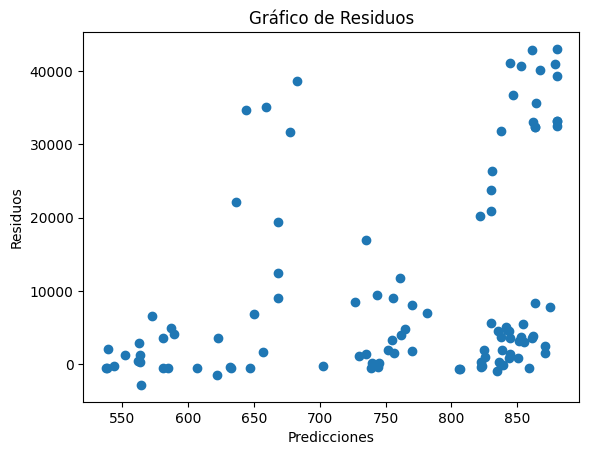

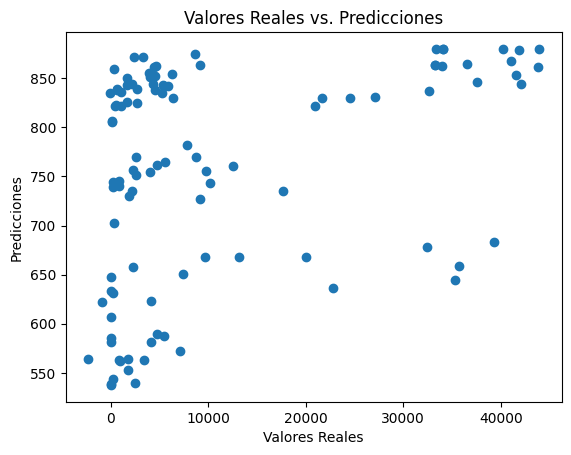

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Predicciones en el conjunto de prueba - uncomment this line
y_pred = pipeline.predict(X_test)

# Métricas de error
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

# Gráfico de residuos
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos")
plt.show()

# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs. Predicciones")
plt.show()

MSE: 29033444.464968152
RMSE: 5388.269152981145
MAE: 3776.923566878981
R-squared: 0.845684268603387


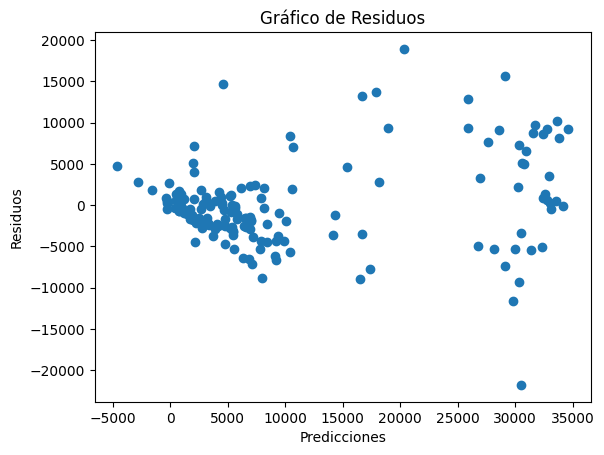

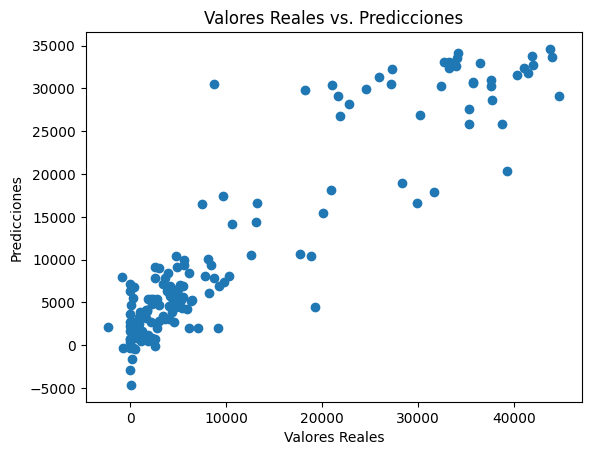

In [75]:
#Ejecutando Modelo de regresion Lineal

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Asumiendo que 'runrates' es tu DataFrame
X = runrates.drop('Sales', axis=1)
y = runrates['Sales']

# Convertir variables categóricas a numéricas usando one-hot encoding
X = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
#mse = mean_squared_error(y_test, y_pred)
#print("Error cuadrático medio (MSE):", mse)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Predicciones en el conjunto de prueba - uncomment this line
y_pred = model.predict(X_test)

# Métricas de error
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

# Gráfico de residuos
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos")
plt.show()

# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs. Predicciones")
plt.show()

In [76]:
#Usando Arboles de decisión

#Preparacion de los datos
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Codificar variables categóricas
categorical_features = ['Country_Name', 'Service Line', 'Product Line', 'Business ID', 'Month']
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(runrates[categorical_features])

# Convertir a DataFrame y concatenar con variables numéricas
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_features))
X = pd.concat([runrates.drop(categorical_features + ['Sales'], axis=1), X_encoded_df], axis=1)
y = runrates['Sales']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creacion y entrenamiento del modelo de arboles de decision.
from sklearn.tree import DecisionTreeRegressor

# Crear instancia del modelo
model = DecisionTreeRegressor(max_depth=5)  # Ajusta max_depth según sea necesario

# Entrenar el modelo
model.fit(X_train, y_train)

#Evaluacion de la predicción

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

ValueError: Found input variables with inconsistent numbers of samples: [544, 521]

In [77]:
# Modelo de redes neuronales para Runrates

# Preparacion de datos
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Normalizar variables numéricas
numerical_features = ['Year']  # Agrega otras variables numéricas si las tienes
scaler = StandardScaler()
X_num = scaler.fit_transform(runrates[numerical_features])

# Codificar variables categóricas
categorical_features = ['Country_Name', 'Service Line', 'Product Line', 'Business ID', 'Month']
encoder = OneHotEncoder(handle_unknown='ignore')
X_cat = encoder.fit_transform(runrates[categorical_features])

# Convertir a DataFrame y concatenar
X_num_df = pd.DataFrame(X_num, columns=numerical_features)
X_cat_df = pd.DataFrame(X_cat.toarray(), columns=encoder.get_feature_names_out(categorical_features))
X = pd.concat([X_num_df, X_cat_df], axis=1)
y = runrates['Sales']

# Dividir datos
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Entrenamiento del modelo
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir la arquitectura del modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Capa de salida sin función de activación para regresión
])

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluar el modelo
loss, mae = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("MAE:", mae)

# Hacer predicciones
y_pred = model.predict(X_test)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 208635200.0000 - mae: 9193.6025 - val_loss: 434120480.0000 - val_mae: 14168.0898
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 272495200.0000 - mae: 10939.3691 - val_loss: 434101056.0000 - val_mae: 14167.4619
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 217616192.0000 - mae: 9476.3115 - val_loss: 434077664.0000 - val_mae: 14166.7051
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 240760048.0000 - mae: 9824.7461 - val_loss: 434042976.0000 - val_mae: 14165.5996
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 269166560.0000 - mae: 10643.7666 - val_loss: 433989856.0000 - val_mae: 14163.9170
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 223566352.0000 - mae: 9548.5732 - val_loss: 433912544.0000 - val_mae: 14161.4707
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 220625584.0000 - mae: 9429.1914 - val_loss: 433802656.0000 - val_mae: 14158.0029
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━

In [78]:
#Modelo KNN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor

# Codificar variables categóricas
categorical_features = ['Country_Name', 'Service Line', 'Product Line', 'Business ID', 'Month']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Change sparse_output to False
X_encoded = encoder.fit_transform(runrates[categorical_features])

# Convertir a DataFrame y concatenar con variables numéricas
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))
# Align indices before concatenation
X = pd.concat([runrates.drop(categorical_features + ['Sales'], axis=1).reset_index(drop=True),
                X_encoded_df.reset_index(drop=True)], axis=1)
y = runrates['Sales'].reset_index(drop=True) # Reset index for y as well

# Separar datos ANTES de normalizar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Normalizar variables numéricas en los conjuntos de entrenamiento y prueba por separado
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Scale only the training set
X_test = scaler.transform(X_test) # Use the same scaler to transform the test set

# Crear y entrenar el modelo KNN
knn_model = KNeighborsRegressor(n_neighbors=5)  # Puedes ajustar el número de vecinos (n_neighbors)
knn_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test)

# Evaluar el modelo (puedes usar métricas como MSE, RMSE, MAE, R-squared)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

MSE: 31493393.32990476
RMSE: 5611.8974803451965
MAE: 3760.1466666666665
R-squared: 0.8384985837412404


In [79]:
# Modelo de regresion Lineal Simple
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Asumiendo que 'runrates' es tu DataFrame
X = runrates[['Product Line']]
y = runrates['Sales']

# Convertir 'Product Line' a numérica usando one-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['Product Line']))

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.3, random_state=0)

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

MSE: 130084001.71337579
RMSE: 11405.437374926742
MAE: 8722.350318471337
R-squared: 0.30859020562926265
